In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import empyrical
%matplotlib inline

In [2]:
DATA_DIR = 'D:/Data/stocks/'
INDEX_FILE = 'D:/Data/index/000906.SH.xlsx'
COMP_FILE = u'D:/Data/index-component/000906.SH.xlsx'

In [3]:
ind_df = pd.read_excel(INDEX_FILE)

In [4]:
comp_df = pd.read_excel(COMP_FILE)

In [5]:
comp_df.head()

,i_weight,sec_name,wind_code
0,0.560,平安银行,000001.SZ
1,1.180,万科A,000002.SZ
2,0.058,深振业A,000006.SZ
3,0.085,神州高铁,000008.SZ
4,0.121,中国宝安,000009.SZ


In [6]:
dic = {}
for code in comp_df['wind_code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    temp = pd.read_excel(fname)
    dic[code] = temp['mkt_freeshares']
df = pd.DataFrame(dic)

In [7]:
df.tail()

,000001.SZ,000002.SZ,000006.SZ,000008.SZ,000009.SZ,000012.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,...,603799.SH,603806.SH,603816.SH,603858.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603993.SH
2018-03-30,8.295207e+10,1.846360e+11,6.531080e+09,1.309574e+10,1.058783e+10,1.085012e+10,6.186011e+09,2.014730e+09,6.226136e+09,7.303039e+09,...,3.934991e+10,2.644770e+09,5.634684e+09,1.697202e+10,2.876610e+09,2.438112e+09,1.597750e+09,5.990416e+09,3.847046e+09,1.942539e+10
2018-04-02,8.150612e+10,1.857452e+11,6.447202e+09,1.311488e+10,1.058783e+10,1.087893e+10,6.327567e+09,1.988291e+09,6.268781e+09,7.306723e+09,...,3.689345e+10,2.698156e+09,5.579442e+09,1.713266e+10,2.889038e+09,2.398436e+09,1.655500e+09,6.140155e+09,3.873516e+09,1.882980e+10
2018-04-03,8.036458e+10,1.865772e+11,6.304919e+09,1.280855e+10,1.079714e+10,1.064839e+10,6.214322e+09,1.993147e+09,6.279442e+09,7.133572e+09,...,3.740134e+10,2.710421e+09,5.557167e+09,1.670648e+10,2.852940e+09,2.391460e+09,1.647250e+09,6.163710e+09,3.751752e+09,1.869236e+10
2018-04-04,8.272376e+10,1.819183e+11,6.358275e+09,1.284684e+10,1.091924e+10,1.082130e+10,6.001988e+09,1.982896e+09,6.162169e+09,7.408649e+09,...,3.710922e+10,2.636113e+09,5.704182e+09,1.692285e+10,2.907974e+09,2.443780e+09,1.690700e+09,5.889468e+09,3.711164e+09,1.823421e+10
2018-04-09,8.386531e+10,1.753737e+11,6.393846e+09,1.271282e+10,1.107623e+10,1.064839e+10,5.973677e+09,2.000701e+09,6.322087e+09,7.564607e+09,...,3.738142e+10,2.675071e+09,5.650722e+09,1.676221e+10,2.967744e+09,2.462528e+09,1.720950e+09,5.856660e+09,3.757046e+09,1.848619e+10


In [247]:
n = 80
mask = df.rank(axis=1, ascending=False)
mask[mask <= n] = 1
mask[mask > n] = 0
cap1 = (mask * df).sum(axis=1)

In [248]:
n = 800
mask = df.rank(axis=1, ascending=False)
mask[mask <= n] = 1
mask[mask > n] = 0
cap2 = (mask * df).sum(axis=1)

In [249]:
ratio = cap1 / cap2

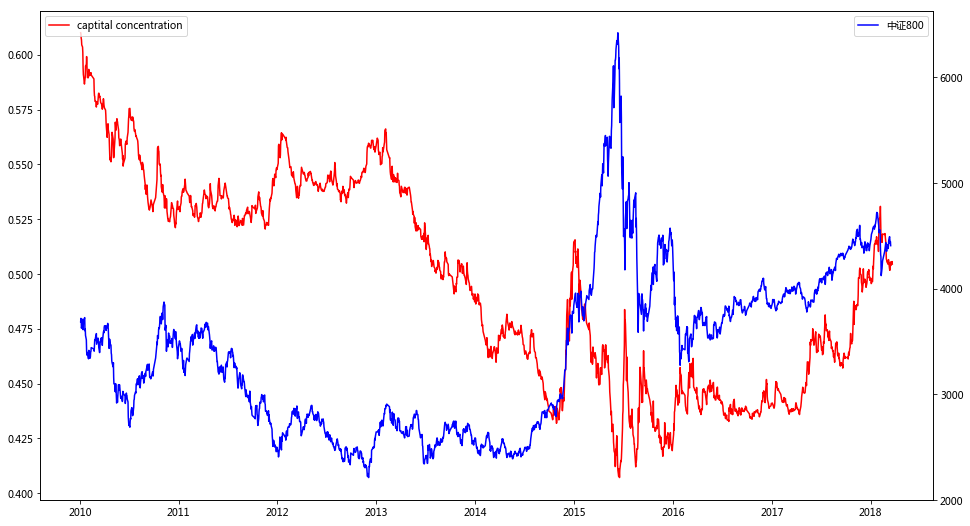

In [250]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df[ind_df.index >= '2010-01-01']['close'], label=u'中证800', color='blue')
ax2.legend()

In [251]:
print ratio.corr(ind_df['close'])

-0.504524883801


In [252]:
rank_ratio = ratio.rolling(window=972).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

In [260]:
rank_ratio.tail()

2018-03-16    0.949588
2018-03-19    0.956790
2018-03-20    0.953704
2018-03-21    0.958848
2018-03-22    0.948560
dtype: float64

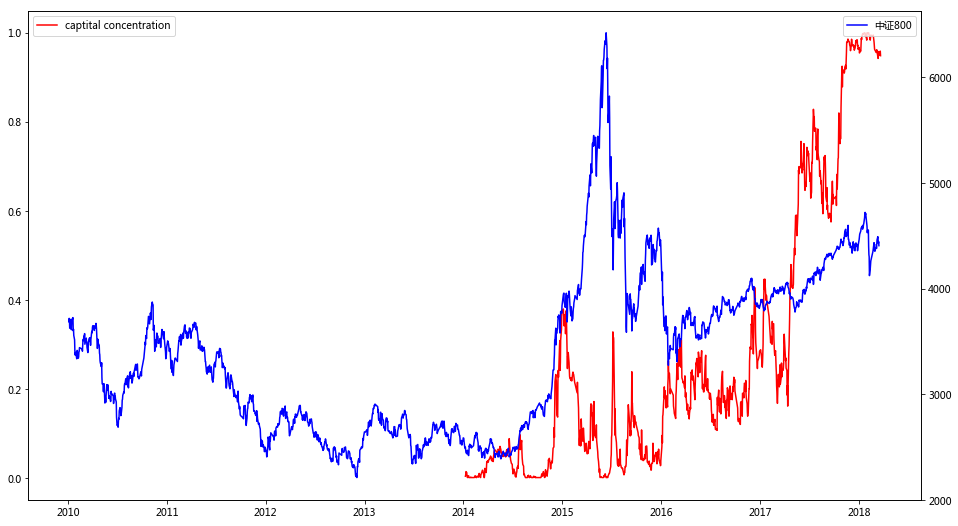

In [253]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(rank_ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df[ind_df.index >= '2010-01-01']['close'], label=u'中证800', color='blue')
ax2.legend()

In [254]:
k = 0.01
[mm, mx] = rank_ratio.quantile([k, 1-k])

In [255]:
mm_index = rank_ratio[rank_ratio <= mm].index
mx_index = rank_ratio[rank_ratio >= mx].index

In [256]:
mm_index.shape, mx_index.shape

((48L,), (11L,))

In [257]:
k = 20
ret_down = ind_df['close'].pct_change().rolling(k).apply(lambda x: empyrical.max_drawdown(x)).shift(-k)
ret_up = ind_df['close'].pct_change().rolling(k).apply(lambda x: -empyrical.max_drawdown(-x)).shift(-k)

In [258]:
ret_down.resample('M').last().quantile([0.4])

0.4   -0.065814
Name: close, dtype: float64

In [259]:
ret_up.quantile([0.95])

0.95    0.181768
Name: close, dtype: float64

# 验证概率

In [228]:
threshold = 0.1

In [229]:
down_right = ret_down.loc[mm_index].resample('M').last().dropna() < -threshold

In [230]:
up_right = ret_up.loc[mm_index].resample('M').last().dropna() > threshold

In [231]:
(down_right | up_right).sum() * 1.0 / down_right.shape[0]

0.25

In [232]:
down_right = ret_down.loc[mx_index].resample('M').last().dropna() < -threshold

In [233]:
up_right = ret_up.loc[mx_index].resample('M').last().dropna() > threshold

In [234]:
(down_right | up_right).sum() * 1.0 / down_right.shape[0]

1.0

In [235]:
ret_down.loc[mx_index].resample('M').last().dropna()

2018-01-31   -0.12666
Freq: M, Name: close, dtype: float64

# 月度数据

In [19]:
ind_df = pd.read_excel('D:/data/index/881001.WI.xlsx')
cap_df = pd.read_excel('D:/market cap.xlsx')

In [20]:
cap_df = cap_df.transpose()

In [21]:
cap_df = cap_df.replace([0.0], np.NAN)

In [22]:
mask = cap_df.rank(axis=1, ascending=False)

In [24]:
n = cap_df.shape[1] - cap_df.isnull().sum(axis=1)

In [34]:
cap = pd.Series(index=n.index)
for date in n.index:
    s = mask.loc[date]
    select = mask.loc[date] < n.loc[date]/10
#     print cap_df.loc[date].sum()
#     print (cap_df.loc[date] * select).sum()
    cap.loc[date] = (cap_df.loc[date] * select).sum()

In [36]:
ratio = cap / cap_df.sum(axis=1)

In [44]:
rank_ratio = ratio.rolling(60).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

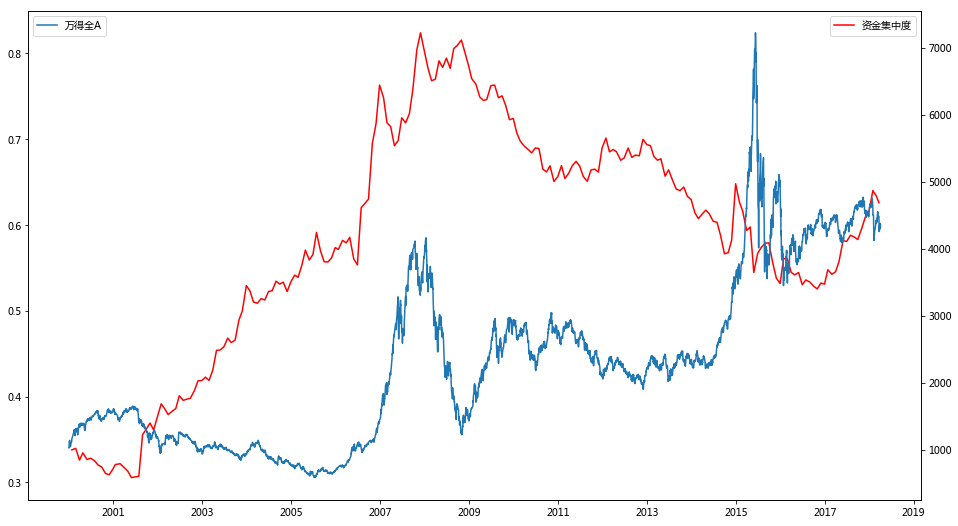

In [49]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='red', label=u'资金集中度')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(ind_df['close'], label=u'万得全A')
ax2.legend(loc='upper left')